<a href="https://colab.research.google.com/github/jx-dohwan/Initial_public_offering_price_prediction/blob/main/Initial_public_offering_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 공모주 시초가 예측 baseline(내가 개인적으로 추가한 6가지 변수를 제외해야 완전한 베이스 라인이 될 것이다.

In [ ]:
# !unzip /content/drive/MyDrive/인공지능/경영빅데이터/data/ipo_원본데이터.zip -d /content/drive/MyDrive/인공지능/경영빅데이터/data

Archive:  /content/drive/MyDrive/인공지능/경영빅데이터/data/ipo_원본데이터.zip
  inflating: /content/drive/MyDrive/인공지능/경영빅데이터/data/ipo_원본데이터.csv  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from scipy.stats import pointbiserialr

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/인공지능/경영빅데이터/data/ipo_원본데이터.csv', encoding="cp949")

## 데이터 기본 정보 파악

In [ ]:
df.head()

,기업명,종속변수,신규상장일,상장년도,상장 시기(상장월),최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,...,매출액(백만원),순이익(백만원),자본금(백만원),공모규모(단위:억),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(주식수),유통가능주식합계(비율)
0,기가비스,0,2023-05-24,2023,5,4,12,0.33,34400,39700,...,"43,973","14,264","2,121",954,0.69,0.06,0.25,12700000,3262630,0.2569
1,모니터랩,1,2023-05-19,2023,5,4,11,0.36,7500,9800,...,"12,014","2,134","1,239",196,0.74,0.01,0.25,12400000,3067550,0.2474
2,씨유박스,0,2023-05-19,2023,5,4,11,0.36,17200,23200,...,"12,273","-1,686","5,048",225,0.70,0.05,0.25,9966633,4886502,0.4903
3,트루엔,0,2023-05-17,2023,5,4,10,0.40,10000,12000,...,"35,980",852,"1,099",300,0.75,0.00,0.25,11000000,4189450,0.3809
4,에스바이오메딕스,0,2023-05-04,2023,5,7,13,0.54,16000,18000,...,"8,868","-5,242","5,496",135,0.75,0.00,0.25,11000000,2957384,0.2690


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   기업명                              528 non-null    object 
 1   종속변수                             528 non-null    int64  
 2   신규상장일                            528 non-null    object 
 3   상장년도                             528 non-null    int64  
 4   상장 시기(상장월)                       528 non-null    int64  
 5   최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  528 non-null    int64  
 6   최근 3개월 공모주 수                     528 non-null    int64  
 7   최근 "따" 비율                        528 non-null    float64
 8   희망공모가_하한                         528 non-null    int64  
 9   희망공모가_상한                         528 non-null    int64  
 10  공모가                              528 non-null    int64  
 11  밴드수익률(공모가/공모가_상한)                528 non-null    float64
 12  기관경쟁률                 

In [ ]:
print(df.describe())

             종속변수         상장년도  상장 시기(상장월)  최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)  \
count  528.000000   528.000000  528.000000                       528.000000   
mean     0.208333  2018.888258    7.651515                         3.498106   
std      0.406502     2.378113    3.456391                         3.412778   
min      0.000000  2015.000000    1.000000                         0.000000   
25%      0.000000  2017.000000    5.000000                         1.000000   
50%      0.000000  2019.000000    8.000000                         2.000000   
75%      0.000000  2021.000000   11.000000                         5.000000   
max      1.000000  2023.000000   12.000000                        17.000000   

       최근 3개월 공모주 수   최근 "따" 비율       희망공모가_하한       희망공모가_상한            공모가  \
count    528.000000  528.000000     528.000000     528.000000     528.000000   
mean      16.867424    0.209034   16750.634470   20059.488636   18410.340909   
std        6.336353    0.176051   17512.012224  

In [ ]:
print(df.isnull().sum())


기업명                                0
종속변수                               0
신규상장일                              0
상장년도                               0
상장 시기(상장월)                         0
최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)    0
최근 3개월 공모주 수                       0
최근 "따" 비율                          0
희망공모가_하한                           0
희망공모가_상한                           0
공모가                                0
밴드수익률(공모가/공모가_상한)                  0
기관경쟁률                              0
청약경쟁률                              0
의무보유확약                             0
주간사                                0
대표주간사                              0
IPO 주간사 순위                         0
총 공모주식 수                           0
신주모집                               0
구주매출                               0
구주매출(비율)                           0
시장구분                               0
업종                                 0
업종(대분류)한국표준산업분류(10차)               0
업종코드                               0
기업구분                               0
매

## 기업명을 숫자 id로 변환

In [ ]:
df['기업명'] = pd.factorize(df['기업명'])[0]
df['기업명']


0        0
1        1
2        2
3        3
4        4
      ... 
523    523
524    524
525    525
526    526
527    527
Name: 기업명, Length: 528, dtype: int64

In [ ]:
df.head()

,기업명,종속변수,신규상장일,상장년도,상장 시기(상장월),최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,...,매출액(백만원),순이익(백만원),자본금(백만원),공모규모(단위:억),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(주식수),유통가능주식합계(비율)
0,0,0,2023-05-24,2023,5,4,12,0.33,34400,39700,...,"43,973","14,264","2,121",954,0.69,0.06,0.25,12700000,3262630,0.2569
1,1,1,2023-05-19,2023,5,4,11,0.36,7500,9800,...,"12,014","2,134","1,239",196,0.74,0.01,0.25,12400000,3067550,0.2474
2,2,0,2023-05-19,2023,5,4,11,0.36,17200,23200,...,"12,273","-1,686","5,048",225,0.70,0.05,0.25,9966633,4886502,0.4903
3,3,0,2023-05-17,2023,5,4,10,0.40,10000,12000,...,"35,980",852,"1,099",300,0.75,0.00,0.25,11000000,4189450,0.3809
4,4,0,2023-05-04,2023,5,7,13,0.54,16000,18000,...,"8,868","-5,242","5,496",135,0.75,0.00,0.25,11000000,2957384,0.2690


In [ ]:
df.set_index('기업명', inplace=True)
df.head()

,종속변수,신규상장일,상장년도,상장 시기(상장월),최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수),최근 3개월 공모주 수,"최근 ""따"" 비율",희망공모가_하한,희망공모가_상한,공모가,...,매출액(백만원),순이익(백만원),자본금(백만원),공모규모(단위:억),전문투자자(비율),우리사주조합(비율),일반청약자(비율),공모후 상장주식수(주식수),유통가능주식합계(주식수),유통가능주식합계(비율)
기업명,,,,,,,,,,,,,,,,,,,,,
0,0,2023-05-24,2023,5,4,12,0.33,34400,39700,43000,...,"43,973","14,264","2,121",954,0.69,0.06,0.25,12700000,3262630,0.2569
1,1,2023-05-19,2023,5,4,11,0.36,7500,9800,9800,...,"12,014","2,134","1,239",196,0.74,0.01,0.25,12400000,3067550,0.2474
2,0,2023-05-19,2023,5,4,11,0.36,17200,23200,15000,...,"12,273","-1,686","5,048",225,0.70,0.05,0.25,9966633,4886502,0.4903
3,0,2023-05-17,2023,5,4,10,0.40,10000,12000,12000,...,"35,980",852,"1,099",300,0.75,0.00,0.25,11000000,4189450,0.3809
4,0,2023-05-04,2023,5,7,13,0.54,16000,18000,18000,...,"8,868","-5,242","5,496",135,0.75,0.00,0.25,11000000,2957384,0.2690


## 불필요한 칼럼삭제

In [ ]:
df = df.drop(['신규상장일', '상장년도', '상장 시기(상장월)', '최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)',
              '최근 3개월 공모주 수', '희망공모가_하한', '희망공모가_상한', '주간사', '대표주간사', '신주모집',
              '구주매출', '시장구분', '업종', '업종(대분류)한국표준산업분류(10차)', '기업구분', '공모규모(단위:억)',
              '우리사주조합(비율)', '일반청약자(비율)', '공모후 상장주식수(주식수)', '유통가능주식합계(주식수)'], axis=1)


In [ ]:
df.head()

,종속변수,"최근 ""따"" 비율",공모가,밴드수익률(공모가/공모가_상한),기관경쟁률,청약경쟁률,의무보유확약,IPO 주간사 순위,총 공모주식 수,구주매출(비율),업종코드,매출액(백만원),순이익(백만원),자본금(백만원),전문투자자(비율),유통가능주식합계(비율)
기업명,,,,,,,,,,,,,,,,
0,0,0.33,43000,1.08,1669.60,823.74,0.4952,8,2218258,0,3,"43,973","14,264","2,121",0.69,0.2569
1,1,0.36,9800,1.00,1715.41,1785.11,0.0606,9,2000000,0,10,"12,014","2,134","1,239",0.74,0.2474
2,0,0.36,15000,0.65,86.44,53.06,0.0369,3,1500000,0,10,"12,273","-1,686","5,048",0.70,0.4903
3,0,0.40,12000,1.00,1688.87,1481.83,0.0824,9,2500000,0,3,"35,980",852,"1,099",0.75,0.3809
4,0,0.54,18000,1.00,854.29,994.80,0.0194,9,750000,0,3,"8,868","-5,242","5,496",0.75,0.2690


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528 entries, 0 to 527
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   종속변수               528 non-null    int64  
 1   최근 "따" 비율          528 non-null    float64
 2   공모가                528 non-null    int64  
 3   밴드수익률(공모가/공모가_상한)  528 non-null    float64
 4   기관경쟁률              528 non-null    float64
 5   청약경쟁률              528 non-null    float64
 6   의무보유확약             528 non-null    float64
 7   IPO 주간사 순위         528 non-null    int64  
 8   총 공모주식 수           528 non-null    int64  
 9   구주매출(비율)           528 non-null    object 
 10  업종코드               528 non-null    int64  
 11  매출액(백만원)           528 non-null    object 
 12  순이익(백만원)           528 non-null    object 
 13  자본금(백만원)           528 non-null    object 
 14  전문투자자(비율)          528 non-null    float64
 15  유통가능주식합계(비율)       528 non-null    float64
dtypes: float64(7), int64(5), o

In [ ]:
print(df.describe())

             종속변수   최근 "따" 비율            공모가  밴드수익률(공모가/공모가_상한)        기관경쟁률  \
count  528.000000  528.000000     528.000000         528.000000   528.000000   
mean     0.208333    0.209034   18410.340909           0.941742   666.384356   
std      0.406502    0.176051   16725.480915           0.163224   576.220191   
min      0.000000    0.000000    1300.000000           0.440000     3.770000   
25%      0.000000    0.070000    9000.000000           0.850000   107.540000   
50%      0.000000    0.150000   14150.000000           1.000000   561.895000   
75%      0.000000    0.320000   22050.000000           1.000000  1126.287500   
max      1.000000    0.770000  190000.000000           1.330000  2269.680000   

              청약경쟁률      의무보유확약  IPO 주간사 순위      총 공모주식 수        업종코드  \
count    528.000000  528.000000  528.000000  5.280000e+02  528.000000   
mean     886.474564    0.117921    7.183712  2.714699e+06    5.821970   
std     3528.350498    0.143469    5.599400  3.937320e+06   

## Object를 int로 변환

In [ ]:
df['매출액(백만원)'] = df['매출액(백만원)'].str.replace(',', '').astype(int)
df['순이익(백만원)'] = df['순이익(백만원)'].str.replace(',', '').astype(int)
df['자본금(백만원)'] = df['자본금(백만원)'].str.replace(',', '').astype(int)
df['구주매출(비율)'] = df['구주매출(비율)'].str.replace('#DIV/0!', '0').astype(float)


In [ ]:
df.head()

,종속변수,"최근 ""따"" 비율",공모가,밴드수익률(공모가/공모가_상한),기관경쟁률,청약경쟁률,의무보유확약,IPO 주간사 순위,총 공모주식 수,구주매출(비율),업종코드,매출액(백만원),순이익(백만원),자본금(백만원),전문투자자(비율),유통가능주식합계(비율)
기업명,,,,,,,,,,,,,,,,
0,0,0.33,43000,1.08,1669.60,823.74,0.4952,8,2218258,0.0,3,43973,14264,2121,0.69,0.2569
1,1,0.36,9800,1.00,1715.41,1785.11,0.0606,9,2000000,0.0,10,12014,2134,1239,0.74,0.2474
2,0,0.36,15000,0.65,86.44,53.06,0.0369,3,1500000,0.0,10,12273,-1686,5048,0.70,0.4903
3,0,0.40,12000,1.00,1688.87,1481.83,0.0824,9,2500000,0.0,3,35980,852,1099,0.75,0.3809
4,0,0.54,18000,1.00,854.29,994.80,0.0194,9,750000,0.0,3,8868,-5242,5496,0.75,0.2690


## 상관관계

In [ ]:
import pandas as pd

# 데이터프레임 df를 가정합니다. 이 데이터프레임은 위에서 언급한 모든 변수를 포함합니다.
correlation_matrix = df.corr()

print(correlation_matrix)


                       종속변수  최근 "따" 비율       공모가  밴드수익률(공모가/공모가_상한)     기관경쟁률  \
종속변수               1.000000   0.239595 -0.127821           0.295946  0.457033   
최근 "따" 비율          0.239595   1.000000 -0.000355           0.241538  0.409574   
공모가               -0.127821  -0.000355  1.000000           0.073223  0.001207   
밴드수익률(공모가/공모가_상한)  0.295946   0.241538  0.073223           1.000000  0.668700   
기관경쟁률              0.457033   0.409574  0.001207           0.668700  1.000000   
청약경쟁률              0.194829   0.083027 -0.018626           0.163262  0.164036   
의무보유확약             0.311322   0.084099  0.166829           0.501081  0.328605   
IPO 주간사 순위        -0.023516   0.059602 -0.114010           0.063678  0.004059   
총 공모주식 수          -0.040624  -0.002346 -0.142462          -0.046490 -0.066984   
구주매출(비율)           0.013589   0.049318  0.091186           0.008508  0.025111   
업종코드               0.033630   0.026676 -0.009273          -0.034096  0.011700   
매출액(백만원)          -0.041719 

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


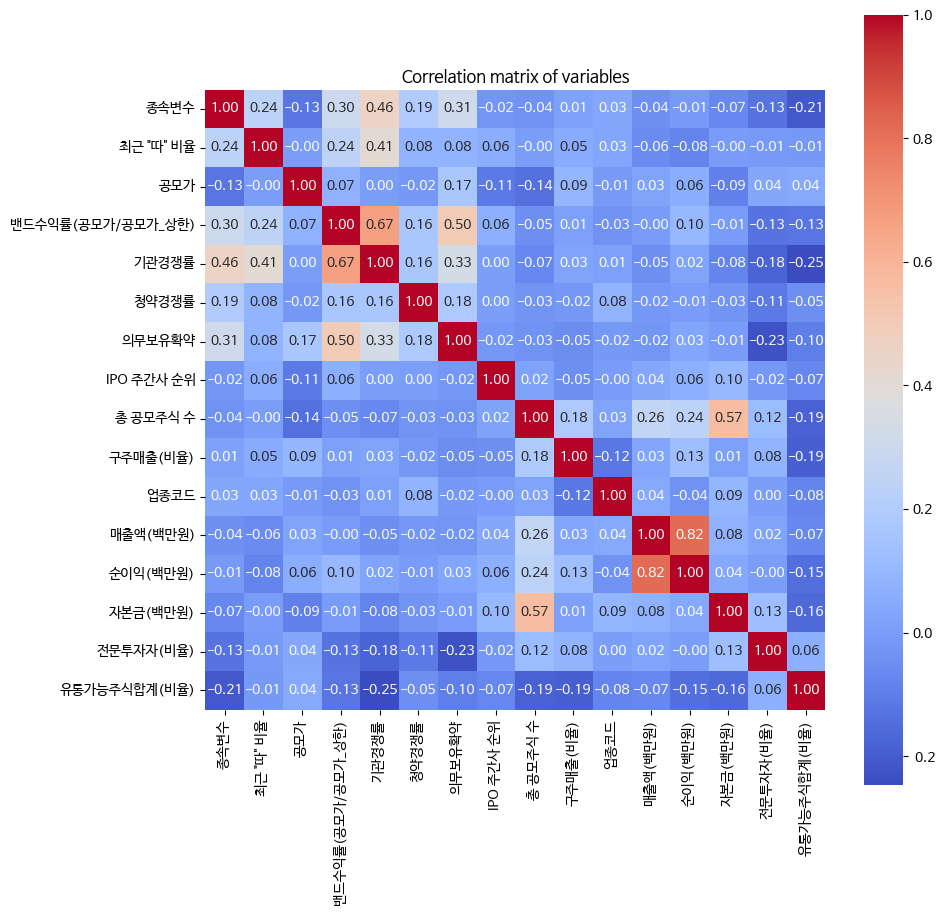

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cmap = 'coolwarm')
plt.title('Correlation matrix of variables')
plt.show()


In [ ]:
from scipy.stats import pointbiserialr

X = df.drop('종속변수',  axis=1)
y = df['종속변수']
# y는 이진변수, X는 연속 변수를 나타내는 DataFrame을 가정합니다.
# 각 피처와 목표 변수 사이의 point-biserial correlation 계산
for column in X.columns:
    pbc = pointbiserialr(X[column], y)
    print(f"The correlation between {column} and 종속변수 is {pbc.correlation}")


The correlation between 최근 "따" 비율 and 종속변수 is 0.23959458616250384
The correlation between 공모가 and 종속변수 is -0.12782099118252638
The correlation between 밴드수익률(공모가/공모가_상한) and 종속변수 is 0.2959464901994922
The correlation between 기관경쟁률 and 종속변수 is 0.45703305906402575
The correlation between 청약경쟁률 and 종속변수 is 0.19482856245242763
The correlation between 의무보유확약 and 종속변수 is 0.31132242742491245
The correlation between IPO 주간사 순위 and 종속변수 is -0.023515980358149405
The correlation between 총 공모주식 수 and 종속변수 is -0.0406240087036585
The correlation between 구주매출(비율) and 종속변수 is 0.013588517251203996
The correlation between 업종코드 and 종속변수 is 0.03363025927601403
The correlation between 매출액(백만원) and 종속변수 is -0.04171941130097362
The correlation between 순이익(백만원) and 종속변수 is -0.011491325269414446
The correlation between 자본금(백만원) and 종속변수 is -0.06725681477568575
The correlation between 전문투자자(비율) and 종속변수 is -0.1325977583866217
The correlation between 유통가능주식합계(비율) and 종속변수 is -0.210246660310484


## 모델

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier


In [ ]:
X = df.drop('종속변수', axis=1)
y = df['종속변수']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Decision Tree (CART)
tree_cart = DecisionTreeClassifier(criterion='gini')  # CART는 'gini' 기준을 사용
tree_cart.fit(X_train, y_train)

# Decision Tree (C5.0) - sklearn에는 C5.0 알고리즘이 없으므로, CART를 사용하거나 별도의 라이브러리가 필요합니다.

# Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam')
mlp.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(10,))

In [ ]:
print("Logistic Regression Score: ", logreg.score(X_test, y_test))
print("Decision Tree (CART) Score: ", tree_cart.score(X_test, y_test))
# print("Decision Tree (C5.0) Score: ", ???)  # C5.0의 경우 별도 처리 필요
print("Neural Network Score: ", mlp.score(X_test, y_test))


Logistic Regression Score:  0.8584905660377359
Decision Tree (CART) Score:  0.7924528301886793
Neural Network Score:  0.7547169811320755


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# 각 모델에 대한 예측값 생성
logreg_pred = logreg.predict(X_test)
tree_cart_pred = tree_cart.predict(X_test)
mlp_pred = mlp.predict(X_test)

# Logistic Regression의 성능 평가
print("Logistic Regression: ")
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

# Decision Tree (CART)의 성능 평가
print("\nDecision Tree (CART): ")
print(confusion_matrix(y_test, tree_cart_pred))
print(classification_report(y_test, tree_cart_pred))

# Neural Network의 성능 평가
print("\nNeural Network: ")
print(confusion_matrix(y_test, mlp_pred))
print(classification_report(y_test, mlp_pred))


Logistic Regression: 
[[73  7]
 [ 8 18]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91        80
           1       0.72      0.69      0.71        26

    accuracy                           0.86       106
   macro avg       0.81      0.80      0.81       106
weighted avg       0.86      0.86      0.86       106


Decision Tree (CART): 
[[67 13]
 [ 9 17]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        80
           1       0.57      0.65      0.61        26

    accuracy                           0.79       106
   macro avg       0.72      0.75      0.73       106
weighted avg       0.80      0.79      0.80       106


Neural Network: 
[[80  0]
 [26  0]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        80
           1       0.00      0.00      0.00        26

    accuracy                           0.75       106
   macr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 추가로 해야할 작업들
- 데이터의 정규화나 표준화, 이상치 처리, 변수 변환(로그 변환 등)을 수행하여 종속변수와의 상관관계를 높이기
- 총 16가지 변수를 사용하였다. 
 - 이를 선택한 기준은 기존 교수님이 제공해준 변수에 6가지 변수를 더 추가하였다. 
 - 그렇기 때문에 기존 변수로 작업했을때 성능과 6가지를 다 사용했을 때의 성능
 - 그리고 6개 중에서 상관관계가 유의미한 변수만 사용했을 때의 성능 세가지를 비교할 필요가 있다.
 - 물론 조건은 같은 모델이여야 한다.
- 그리드 서치, 랜덤포레스트, 유전알고리즘 등을 활용하여 최적의 해를 찾아서 모델 고도화하기

> 결론적으로 
 - 데이터 품질 향상 미작업 + 교수님 제공 변수 + 기본 하이퍼파라미터
 - 데이터 품질 향상 작업 + 교수님 제공 변수 + 기본 하이퍼파라미터
 - 데이터 품질 향상 작업 + 교수님 제공 변수에 추가로 6가지 변수 사용 + 기본 하이퍼파라미터
 - 데이터 품질 향상 작업 + 교수님 제공 변수에 추가로 6가지 변수중 유의미한 변수 사용 + 기본 하이퍼파라미터
 - 위의 것을 통해서 최적의 데이터 상태가 파악되면 하이퍼파라미터를 그리드서치, 랜덤서치등으로 고도화작업
 
 
- 마지막 결과 해석
 - 새로 추가한 변수가 미치는 영향
  - 상관관계
  - 실제 모델 결과
 - 모델별로 성능이 상이한데 더 좋은 성능의 모델이 있다면 왜 더 좋은지
 - 평가지표에서 recall precision, f1-score, accuracy가 있는데 여기에서는 무엇을 더 중요하게 봐야 하는지
 - 데이터 품질 개선을 위해서 어떤 기법을 왜 사용하였는가?

 
